In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import pandas as pd

In [ ]:
data_train_file = "../input/fashion-mnist_train.csv"
data_test_file = "../input/fashion-mnist_test.csv"

df_train = pd.read_csv(data_train_file)
df_test = pd.read_csv(data_test_file)

In [ ]:
import train test split

In [ ]:
xtrain, ytarin xtest ytest = train tets split()

In [ ]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [ ]:
for i in range(5000,5005): 
    sample = np.reshape(df_test[df_test.columns[1:]].iloc[i].values/255, (28,28))
    plt.figure()
    plt.title("labeled class {}".format(get_label_cls(df_test["label"].iloc[i])))
    plt.imshow(sample, 'gray')

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_test = Y_test.reshape(X_test.shape[0], 1)

In [4]:
# Explore the dataset
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 1)
X_test shape: (10000, 784)
Y_test shape: (10000, 1)


In [5]:
# normalize the xalues
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
mapping = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

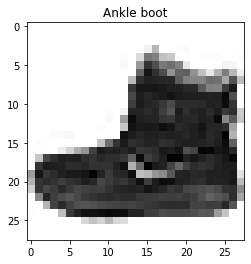

In [9]:
#see any image of the dataset
i = 0
img = X_train[i, :]
img = img.reshape(28, 28)
plt.imshow(255 - img, cmap = 'gray')
plt.title(mapping[Y_train[i][0]]);

In [10]:
from keras.models import Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


In [11]:
# define the model
model = Sequential()
model.add(Dense(30, activation = 'relu', input_shape = (784, )))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [12]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 512, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 72us/step - loss: 1.1710 - accuracy: 0.5948 - val_loss: 0.6810 - val_accuracy: 0.7694
Epoch 2/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.5971 - accuracy: 0.8019 - val_loss: 0.5367 - val_accuracy: 0.8155
Epoch 3/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.5037 - accuracy: 0.8275 - val_loss: 0.4806 - val_accuracy: 0.8346
Epoch 4/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.4585 - accuracy: 0.8423 - val_loss: 0.4536 - val_accuracy: 0.8379
Epoch 5/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.4307 - accuracy: 0.8521 - val_loss: 0.4330 - val_accuracy: 0.8503
Epoch 6/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.4138 - accuracy: 0.8553 - val_loss: 0.4217 - val_accuracy: 0.8522
Epoch 7/50
48000/48000 [==============================] - 1s 21us/st

In [15]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(test_acc * 100)  + "%")

10000/10000 [==============================] - 0s 32us/step
Accuracy on train set is 90.256667%
Accuracy on validation set is 86.500001%
